In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.shape

(158, 12)

Here we can see we have 158 rows and 12 columns in the world happiness report dataset

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
df['Country'].nunique()

158

In [11]:
df.drop(['Country','Region','Happiness Rank'],axis=1, inplace=True)

so here droping 3 unnecessary columns those are not usefull for the prediction of model.

In [12]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


so now we have the description of the new dataset in which we can notice there are some outliers present in data

# EDA

In [13]:
dfcor=df.corr()
dfcor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [14]:
dfcor['Happiness Score']

Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

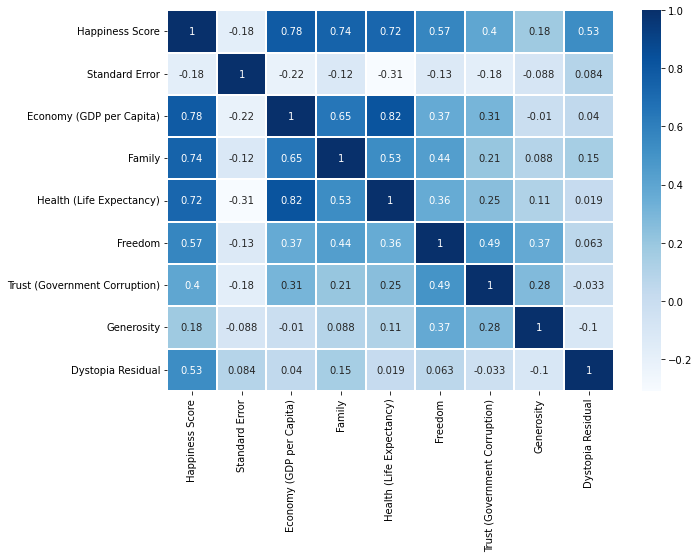

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr('pearson'),annot=True, linewidth=0.3, cmap='Blues')
dfcor['Happiness Score']

as here we can see that column - Economy(GDP per Capital), Family, Health(Life Expectancy) are highly corelated with the target data.

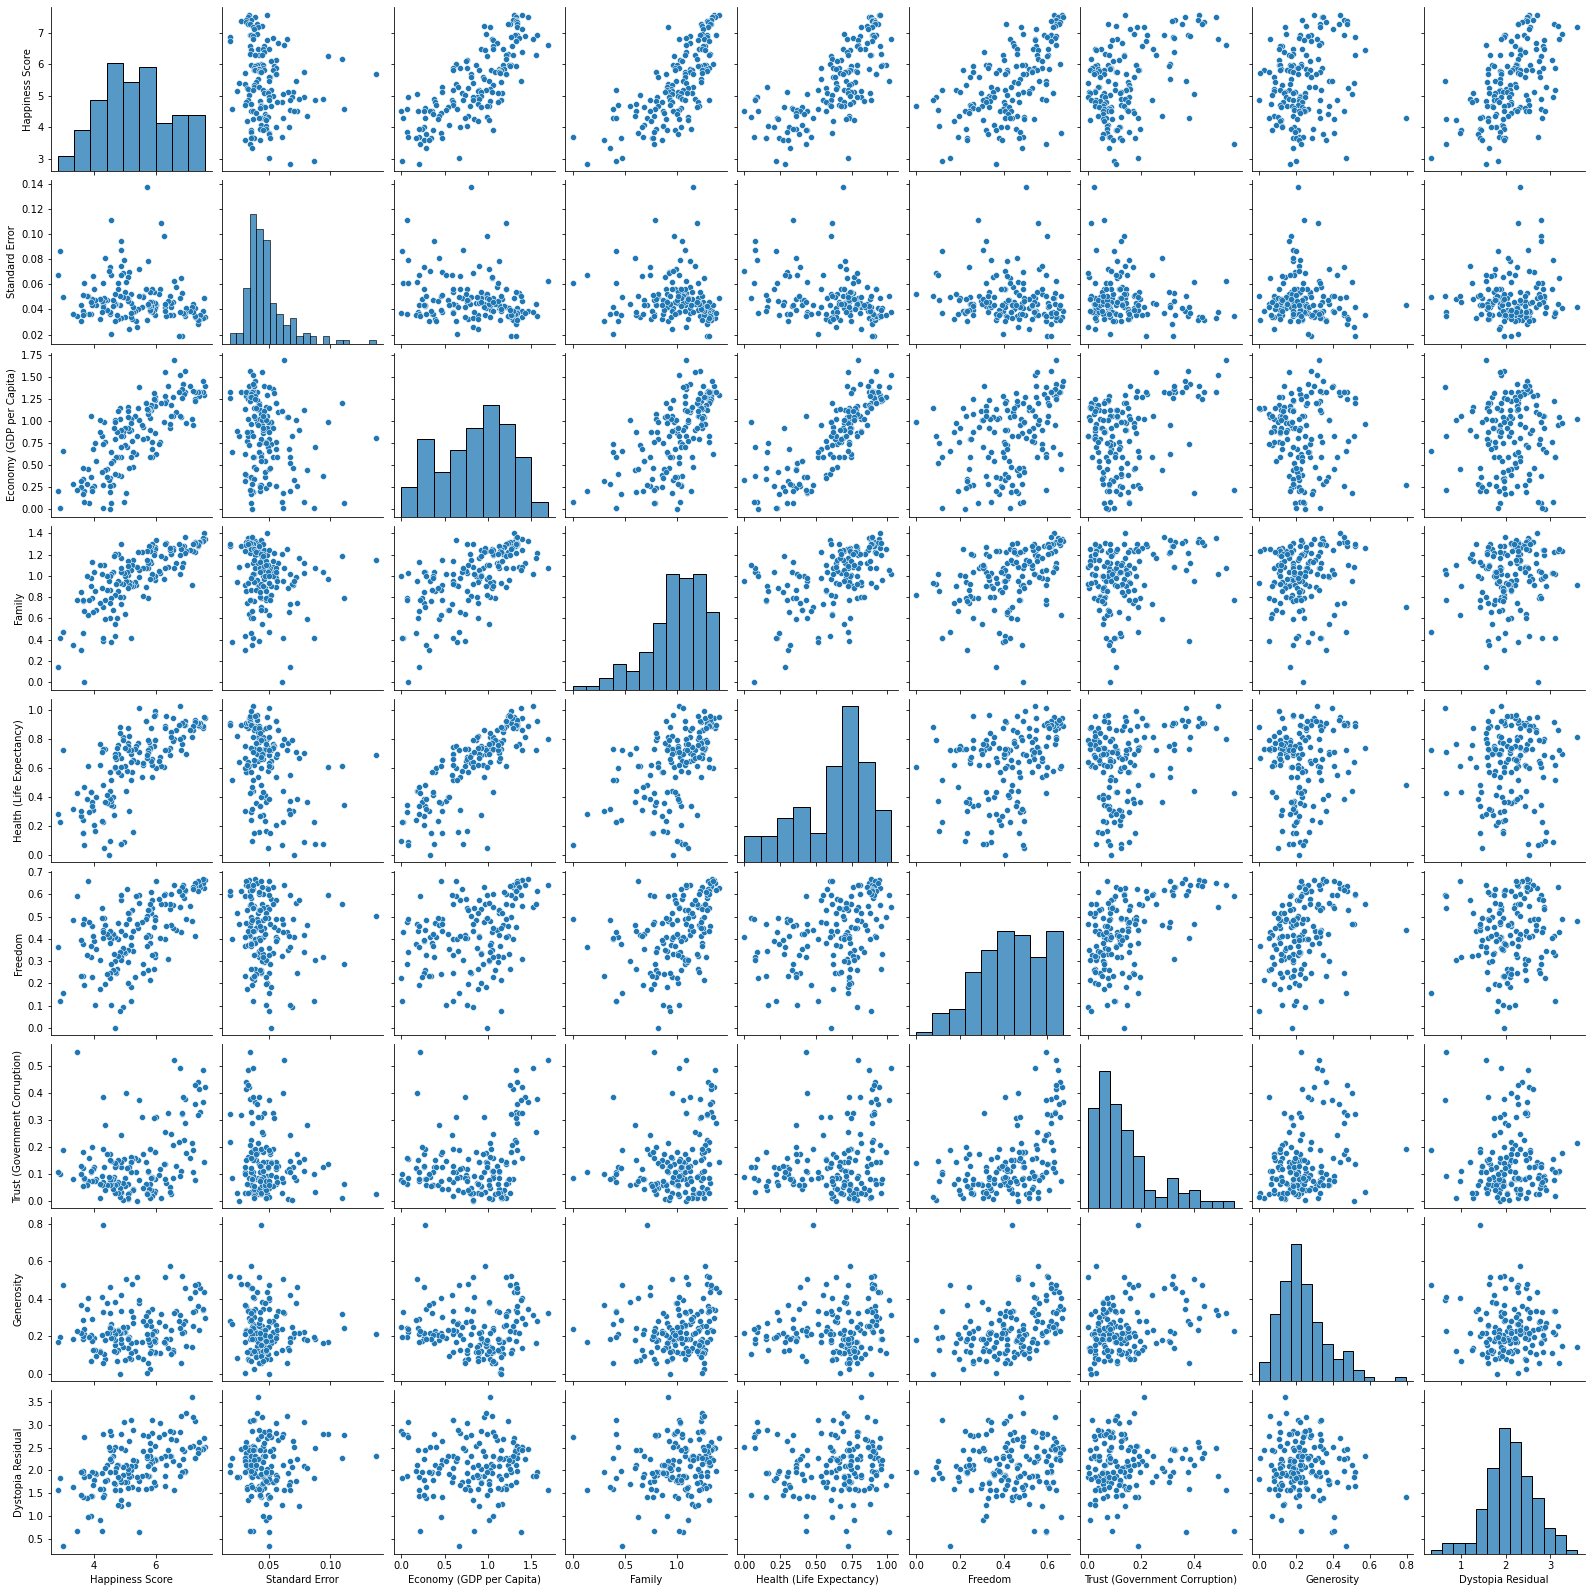

In [16]:
sns.pairplot(df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

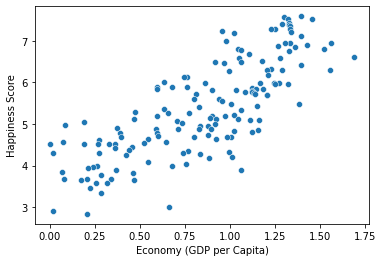

In [17]:
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df)

we can notice when there is increase in Economy(GDP per Capita), that also increase the Happiness score of that country.

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

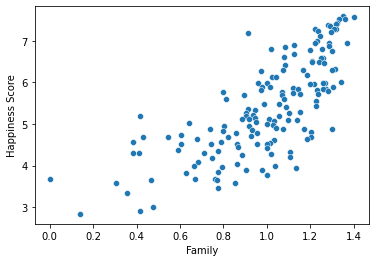

In [18]:
sns.scatterplot(x='Family', y='Happiness Score', data=df)

here also we notice increase in Family that is also increasing the Happiness Score.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

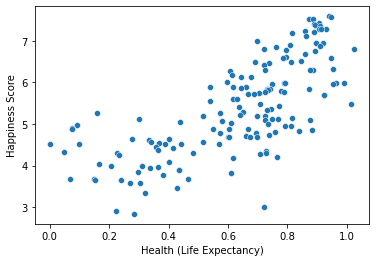

In [20]:
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score', data=df)

here we see the country which has Health (Life Expecatancy) also increase therir Happiness Score

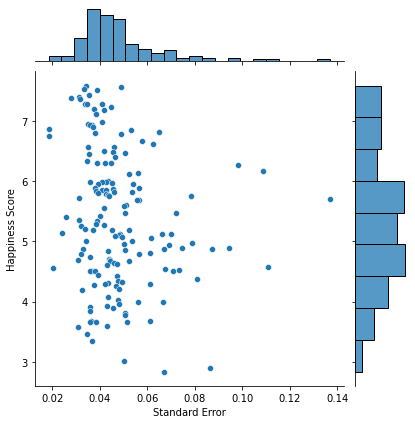

In [21]:
sns.jointplot(x='Standard Error', y='Happiness Score', data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

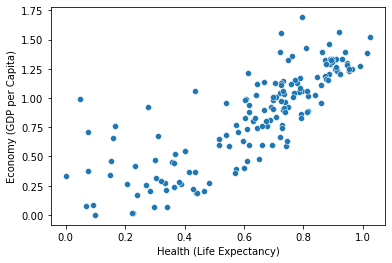

In [22]:
sns.scatterplot(y='Economy (GDP per Capita)', x='Health (Life Expectancy)', data=df)

in the above cell we can see that the corelation between 'Economy (GDP per Capita)' and 'Health (Life Expectancy)' , increase in "Economy (GDP per Capita)" also increase the Health(Life Expectancy)

# Skewness Check

In [23]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [25]:
columns=['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

In [26]:
list(enumerate(columns))

[(0, 'Happiness Score'),
 (1, 'Standard Error'),
 (2, 'Economy (GDP per Capita)'),
 (3, 'Family'),
 (4, 'Health (Life Expectancy)'),
 (5, 'Freedom'),
 (6, 'Trust (Government Corruption)'),
 (7, 'Generosity'),
 (8, 'Dystopia Residual')]

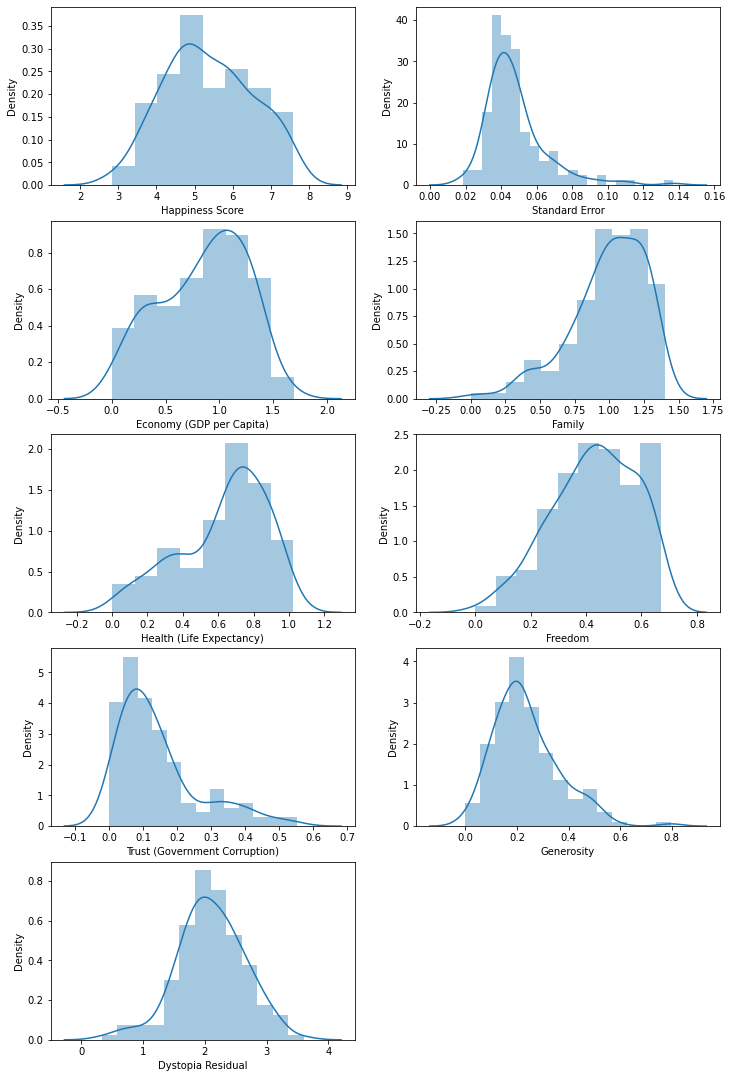

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [27]:
plt.figure(figsize=(12,19))
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()
df.skew()

here we notice columns - Standard Error , Trust (Government Corruption) are highly skewed and few other columns- Family, Health(Life Expectancy) and Generosity are also little skewed

# Check Outliers using zscore

In [28]:
from scipy.stats import zscore

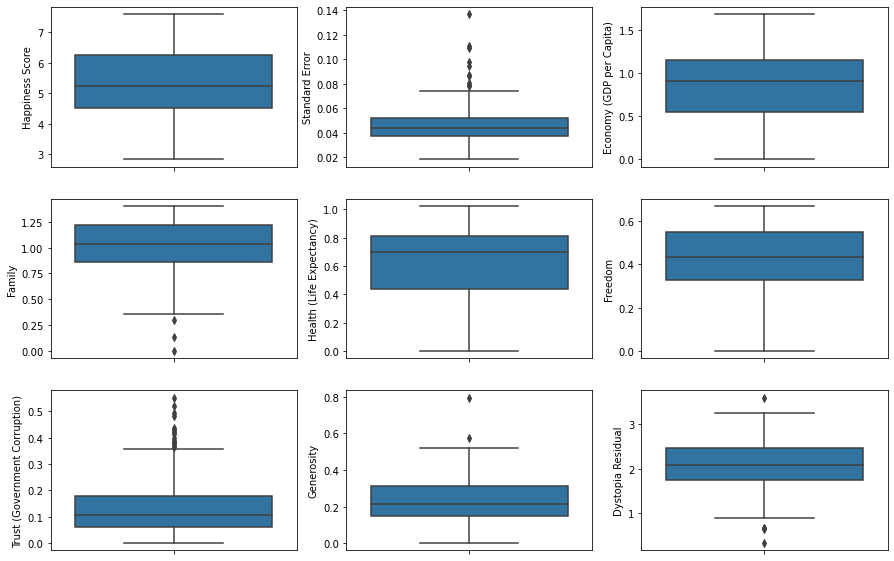

In [29]:
plt.figure(figsize=(15,10))
for j in enumerate(columns):
    plt.subplot(3,3,j[0]+1)
    sns.boxplot(y=df[j[1]])

In [30]:
zscore_outliers=np.abs(zscore(df))
threshold=3
print('Outliers:- \n',np.where(zscore_outliers>3))

Outliers:- 
 (array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


# Outliers Removal (Using zscore)

In [31]:
dfzscore=df[(zscore_outliers<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",dfzscore.shape)

Before removing outliers:: (158, 9)
After removing outliers:: (149, 9)


here we can see after removing outliers we have 149 rows and 9 columns in dataset

# Using IQR

In [32]:
from scipy import stats
IQR = stats.iqr(df)
IQR

1.0912775

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [34]:
IQR = df[~ ((df < (Q1 -1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR.shape)

(157, 9)


Using zscore we can see there are 9 rows have been removed But by using IQR we can notice there is only 1 row has been removed . So here considering IQR method

In [35]:
df=IQR

In [36]:
df.shape

(157, 9)

so after removing outliers we have 157 rows and 9 columns in new dataset.

# Skewness removal

In [37]:
df_corr=df.corr()
df_corr['Happiness Score']  # between 0.7 to 0.9 considered as high correlated

Happiness Score                  1.000000
Standard Error                  -0.164471
Economy (GDP per Capita)         0.776983
Family                           0.730683
Health (Life Expectancy)         0.720207
Freedom                          0.571561
Trust (Government Corruption)    0.397340
Generosity                       0.175369
Dystopia Residual                0.526720
Name: Happiness Score, dtype: float64

As we can see columns- Economy (GSP per Capita), Family, Health(Life Expectancy) are highly corelated with the target data.

In [38]:
df.skew()

Happiness Score                  0.132185
Standard Error                   2.014320
Economy (GDP per Capita)        -0.329059
Family                          -0.952032
Health (Life Expectancy)        -0.725796
Freedom                         -0.420609
Trust (Government Corruption)    1.376728
Generosity                       0.992192
Dystopia Residual               -0.253134
dtype: float64

So here columns - Standard Error , Trust(Government Corruption) are highly skewed. And few other columns - Family , Health(Life Expectancy) , Generosity are also little skewed and highly correlated with target variable.

If we remove skewness from those columns who are highly correlated with target variable , that can affect the correlation of these columns .

So we only remove the skewness from those column, those are skewed and less correlated with target variable.

Before removing skewness:-


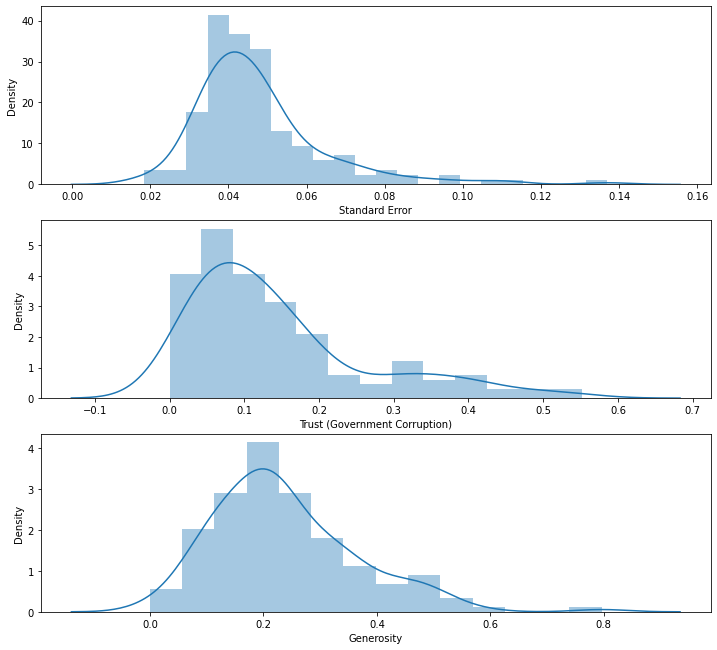

In [39]:
# selecting column to remove skewness

skewed=['Standard Error', 'Trust (Government Corruption)', 'Generosity']
print('Before removing skewness:-')
plt.figure(figsize=(12,19))
for i in enumerate(skewed):
    plt.subplot(5,1,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

In [40]:
# removing skewness:-

df[['Standard Error',
    'Trust (Government Corruption)',
    'Generosity']]=np.sqrt(df[['Standard Error','Trust (Government Corruption)', 'Generosity']])

After removing skewness:-


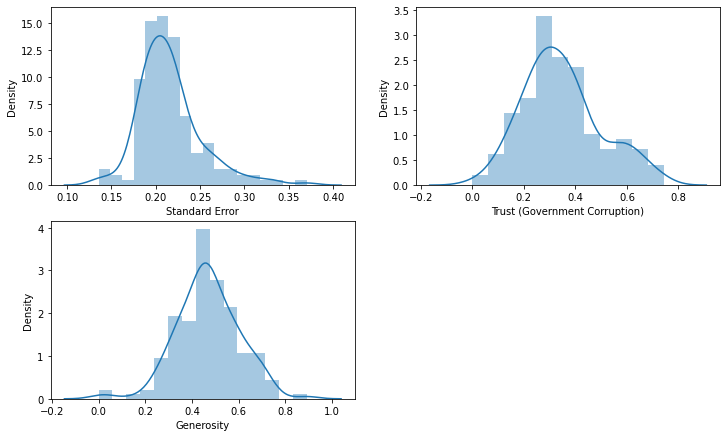

In [41]:
print('After removing skewness:-')
plt.figure(figsize=(12,19))
for i in enumerate(skewed):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]])
plt.show()

In [42]:
df.skew()

Happiness Score                  0.132185
Standard Error                   1.251489
Economy (GDP per Capita)        -0.329059
Family                          -0.952032
Health (Life Expectancy)        -0.725796
Freedom                         -0.420609
Trust (Government Corruption)    0.503645
Generosity                      -0.138906
Dystopia Residual               -0.253134
dtype: float64

so we can see that the skewness has been removed from the selected columns.

# Dividing data into x and y

In [44]:
x= df.drop(['Happiness Score'], axis=1)
y= df['Happiness Score']

In [45]:
x.shape

(157, 8)

In [46]:
y.shape

(157,)

# Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Spliting the data for training and testing

In [48]:
# splitting the data into 76% training and 24% testing
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.24, random_state=43)

In [49]:
x_train.shape

(119, 8)

In [50]:
y_train.shape

(119,)

In [51]:
x_test.shape

(38, 8)

In [52]:
y_test.shape

(38,)

here split the data for testing and training

# Linear Regression

In [53]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [54]:
LR.coef_

array([-0.12392902,  1.03064977,  1.00707678,  1.00425337,  0.99663038,
        0.71776411,  0.99980346,  0.99271501])

In [55]:
LR.score(x_train,y_train)

0.9986614007643483

In [56]:
LR_predict=LR.predict(x_test)

In [57]:
print(LR_predict)

[3.89486374 5.21243992 4.86486489 7.56438663 5.55174278 5.9119705
 3.99786364 5.79281721 6.89516883 5.72650744 7.31882119 4.52233743
 3.82692739 4.59903389 4.79763613 7.46783106 7.26498204 4.6386232
 7.00648761 7.24829663 4.19932448 4.97110549 5.29420488 6.01767407
 6.33105795 5.44497298 7.58958896 6.48870222 4.04089112 3.94968769
 5.21378309 5.83911417 6.94175322 6.2903913  5.59519712 6.35103043
 4.51631883 4.60418292]


In [58]:
print(y_test)

142    3.896
80     5.194
98     4.876
0      7.587
69     5.548
50     5.890
138    3.989
62     5.754
19     6.901
66     5.689
10     7.278
119    4.517
144    3.819
116    4.565
103    4.800
2      7.527
11     7.226
113    4.633
15     6.983
12     7.200
129    4.297
93     4.971
76     5.286
45     5.987
38     6.295
72     5.429
1      7.561
30     6.505
136    4.033
140    3.931
79     5.212
57     5.824
17     6.940
39     6.269
67     5.605
37     6.298
122    4.507
101    4.857
Name: Happiness Score, dtype: float64


In [59]:
#checking the model performance and accuracy using Mean Squared Error(MSE)
print(np.mean((LR_predict - y_test)**2))

0.0025410515872751945


In [60]:
#checking the model performance and accuracy using mean Squared Error(MSE) and sklearn.metrics
print(mean_squared_error(LR_predict,y_test))

0.0025410515872751945


In [61]:
#checking the model performance and accuracy usin mean_absolute_error(MAE) and sklearn.matrics
print(mean_absolute_error(LR_predict,y_test))

0.027928079403230038


In [62]:
#checking the model performance and accuracy using r2_score and sklearn.metrics
print(r2_score(LR_predict,y_test))

0.9981034687370269


# SVR

In [63]:
from sklearn.svm import SVR

SVR(kernel= 'linear')

In [64]:
svr_l=SVR(kernel='linear')
svr_l.fit(x_train,y_train)
print(svr_l.score(x_train,y_train))
svrpred_l=svr_l.predict(x_test)

0.9965494826931235


In [65]:
print('MSE:-',mean_squared_error(svrpred_l,y_test))
print('MAE:-',mean_absolute_error(svrpred_l,y_test))
print('r2_score:-',r2_score(svrpred_l,y_test))

MSE:- 0.0038177759170634176
MAE:- 0.054512258534241596
r2_score:- 0.9969525966593408


SVR(kernel='poly')

In [66]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.975134948012899


In [67]:
print('MSE:-',mean_squared_error(svrpred_p,y_test))
print('MAE:-',mean_absolute_error(svrpred_p,y_test))
print('r2_score:-',r2_score(svrpred_p,y_test))

MSE:- 0.043012815264036906
MAE:- 0.15965666067471507
r2_score:- 0.9716838281687601


SVR(kernel= 'rbf')

In [68]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.9888603649016385


In [69]:
print('MSE:-',mean_squared_error(svrpred_r,y_test))
print('MAE:-',mean_absolute_error(svrpred_r,y_test))
print('r2_score:-',r2_score(svrpred_r,y_test))

MSE:- 0.012559431834542336
MAE:- 0.09078454534553473
r2_score:- 0.9895468991333666


According to all metrics score selecting the SVR(kernel='poly') is the best model .

# Saving the Model

In [70]:
import joblib

In [71]:
#save the best score model in joblib
joblib.dump(svr_p,'World_Happiness_Report_project')

['World_Happiness_Report_project']